# **Bellabeat Case Study**

*Google's Data Analytics Certificate Capstone: Exploratory Analysis of Health Tracker Data*

# Introduction

The Objective of this case study is to analyze consumer data and provide insights to help guide a company’s marketing strategy. Bellabeat is successful, small company that manufactures high-tech health products for women. Its co-founder and chief creative officer, Urška Sršen, believes analyzing smart device data can be helpful in discovering trends in consumer usage. Being a women herself she believes Women of all age should be considered and it is to be noted that women who gain weight suddenly or who are sleep deprived are most vulnerable and we need to identify what age group they fall and how well they can handle smart device features.Things to motivate them by analyzing user data, one could identify some trends in user sleep habits, inactivity and activity levels and water intake in a day. This analysis will describe the trends as well as provide a high-level recommendation for marketing Bellabeat’s products.

# Data
The dataset used in this analysis is available under a public domain license through Kaggle but i have only downloaded few of the datasets pertaining to my interest and these are loaded in zipped folder. The dataset contains personal fitness tracker information collected from thirty Fitbit users. Fitbit is a company that specializes in wearable fitness and health technology. The data includes users’ active minutes. According to Fitbit, active minutes are earned through ten or more minutes of continuous moderate to intense activity. Additionally, the dataset contains information on users’ sleep duration. Since the data was generated from a survey of only thirty Fitbit users, its sample size is limited. However, identifying trends within the Fitbit data can still be helpful in determining how to best market Bellabeat products since both companies have similar target consumers.

# Settting Up Enviroment in PYTHON

Load Libraries and dataset into Python.

In [1]:
import numpy as np
import pandas as pd
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
minute_sleep = pd.read_csv("minuteSleep_merged.csv")
heartrate_seconds = pd.read_csv("heartrate_seconds_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
weightloginfo = pd.read_csv("weightLogInfo_merged.csv")
dailyCalories = pd.read_csv("dailyCalories_merged.csv")

Lets check the pattern in the daily activity and sleepday 

In [4]:
daily_activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
for v in sleep_day['SleepDay']:
    print(v)

4/12/2016 12:00:00 AM
4/13/2016 12:00:00 AM
4/15/2016 12:00:00 AM
4/16/2016 12:00:00 AM
4/17/2016 12:00:00 AM
4/19/2016 12:00:00 AM
4/20/2016 12:00:00 AM
4/21/2016 12:00:00 AM
4/23/2016 12:00:00 AM
4/24/2016 12:00:00 AM
4/25/2016 12:00:00 AM
4/26/2016 12:00:00 AM
4/28/2016 12:00:00 AM
4/29/2016 12:00:00 AM
4/30/2016 12:00:00 AM
5/1/2016 12:00:00 AM
5/2/2016 12:00:00 AM
5/3/2016 12:00:00 AM
5/5/2016 12:00:00 AM
5/6/2016 12:00:00 AM
5/7/2016 12:00:00 AM
5/8/2016 12:00:00 AM
5/9/2016 12:00:00 AM
5/10/2016 12:00:00 AM
5/11/2016 12:00:00 AM
4/29/2016 12:00:00 AM
4/30/2016 12:00:00 AM
5/2/2016 12:00:00 AM
5/8/2016 12:00:00 AM
4/15/2016 12:00:00 AM
4/30/2016 12:00:00 AM
5/1/2016 12:00:00 AM
4/12/2016 12:00:00 AM
4/13/2016 12:00:00 AM
4/15/2016 12:00:00 AM
4/26/2016 12:00:00 AM
4/28/2016 12:00:00 AM
4/12/2016 12:00:00 AM
4/13/2016 12:00:00 AM
4/14/2016 12:00:00 AM
4/15/2016 12:00:00 AM
4/16/2016 12:00:00 AM
4/17/2016 12:00:00 AM
4/19/2016 12:00:00 AM
4/20/2016 12:00:00 AM
4/21/2016 12:00:00 AM

This is one of the data cleaning process where all the sleep record is noted at 12 AM so lets get rid of this time factor 

In [7]:
def new_activity(row):
    row.SleepDay = row.SleepDay[:9]
    return row
sleep_day=sleep_day.apply(new_activity, axis="columns").rename(columns={"SleepDay":"ActivityDate"})

In [8]:
sleep_day.head()#Now the time has been removed.

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712


Now lets compare two attributes say total steps have any relation with sleep?
Let's combine two table in just one table. for this we have to make sure that there is no null/missing values and keep only two column TotalMinutesAsleep & TotalSteps from dailyactivitywithsleep.

In [9]:
left = daily_activity.set_index(['Id','ActivityDate'])
right = sleep_day.set_index(['Id','ActivityDate'])
dailyactivitywithsleep = left.join(right)
dailyactivitywithsleep.reset_index()
dailyactivitywithsleep=dailyactivitywithsleep.drop_duplicates(keep='first',inplace=False).reset_index()
stepsnsleep = dailyactivitywithsleep[['TotalSteps','TotalMinutesAsleep']].dropna(subset=['TotalMinutesAsleep'])
stepsnsleep.to_csv("stepsnsleep.csv") #downloading for spreadsheet program.

In [10]:
stepsnsleep = pd.read_csv("stepsnsleep.csv")
stepsnsleep.head()

,Unnamed: 0,TotalSteps,TotalMinutesAsleep
0,0,13162,327.0
1,1,10735,384.0
2,3,9762,412.0
3,4,12669,340.0
4,5,9705,700.0


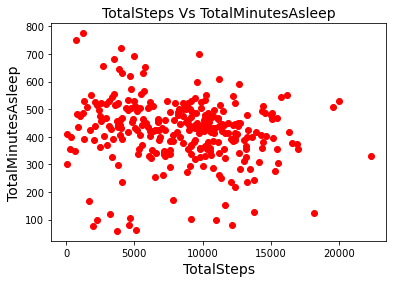

In [15]:
plt.scatter(stepsnsleep['TotalSteps'], stepsnsleep['TotalMinutesAsleep'], color='red', marker='o')
plt.title('TotalSteps Vs TotalMinutesAsleep', fontsize=14)
plt.xlabel('TotalSteps', fontsize=14)
plt.ylabel('TotalMinutesAsleep', fontsize=14)
plt.grid(False)
plt.show()


Here we can see that who sleeps more time approximately 800 minutes per day, her total steps is between 0-5000. On the other hand, who steps daily 15000-20000 daily, her sleep time is minimum.

Who walks more?
We have to analyze that women having different BMI scales, how much they walk?

In [16]:
def new_activity(row):
    row.Date = row.Date[:9]
    return row

weightloginfo=weightloginfo.apply(new_activity, axis="columns").rename(columns={"Date":"ActivityDate"})
weightloginfo=weightloginfo[['Id','ActivityDate','BMI']]
left = weightloginfo.set_index(['Id','ActivityDate'])
right = dailyactivitywithsleep.set_index(['Id','ActivityDate'])
n=left.join(right)
stepswithBMI=n.reset_index()[["Id","ActivityDate","BMI","TotalDistance"]].dropna(subset=['TotalDistance'])
meanforbestBMI=stepswithBMI.loc[(stepswithBMI.BMI >= 18.5) & (stepswithBMI.BMI <= 24.9)].TotalDistance.mean()
meanforhighBMI=stepswithBMI.loc[(stepswithBMI.BMI > 24.9) & (stepswithBMI.BMI <= 29.9)].TotalDistance.mean()
output=pd.DataFrame({'Best BMI': [meanforbestBMI], 'High BMI': [meanforhighBMI]})
output.to_csv("average_distance_with_BMI.csv")

In [32]:
average_distance_with_BMI=pd.read_csv("average_distance_with_BMI.csv")
average_distance_with_BMI.head()
#import matplotlib.pyplot
#matplotlib.pyplot.bar("Best BMI",height, width=0.8, bottom=None, align='center', data=None)

,Unnamed: 0,Best BMI,High BMI
0,0,6.717826,13.115909


<AxesSubplot:title={'center':'BAR COUNT plot'}, xlabel='Best BMI', ylabel='count'>

<Figure size 432x288 with 0 Axes>

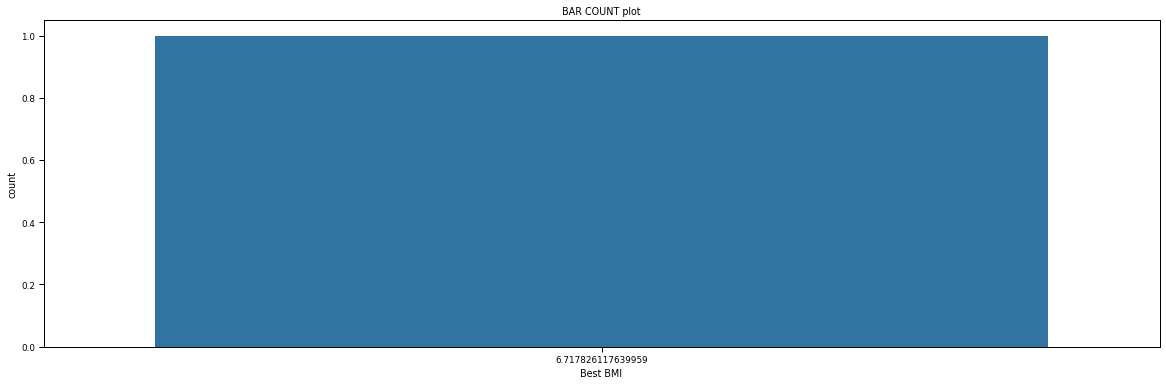

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(20,6))
plt.title('BAR COUNT plot')
sns.set_context('paper')
sns.countplot(x='Best BMI', data=average_distance_with_BMI)


When the heart-rate become top picks?
From heartrate_seconds dataset, we'll calculate average heart rate value per hour in everyday.


In [20]:
hours = pd.to_datetime(heartrate_seconds['Time']).dt.strftime('%H')
heartrate_seconds['Hour']=hours
hourvsvalue=heartrate_seconds.groupby('Hour').Value.mean()
hourvsvalue=hourvsvalue.to_csv('hourvsheartrate.csv')

In [22]:
hourvsheartrate = pd.read_csv("hourvsheartrate.csv")
hourvsheartrate.head()

,Hour,Value
0,0,66.723642
1,1,65.642436
2,2,63.566506
3,3,61.143456
4,4,60.231779


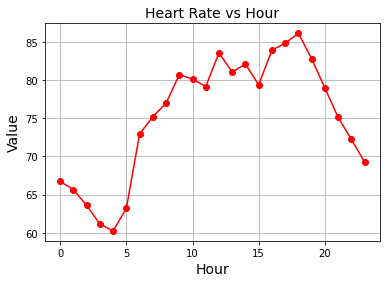

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

  
plt.plot(hourvsheartrate['Hour'], hourvsheartrate['Value'], color='red', marker='o')
plt.title('Heart Rate vs Hour', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.show()

It seems, heart rate becomes lowest at midnight like 3:30AM-4:00AM. At the afternoon to evening, heart rate becomes highest, that means maximum users do exercise or heavy activity at that time.

Now, let's play with Acitive minutes
When women go for walks then how they spend that time we can see here.

In [25]:
daily_intensities['TotalActiveMinutes']=daily_intensities['LightlyActiveMinutes']+daily_intensities['FairlyActiveMinutes']+daily_intensities['VeryActiveMinutes']
avg_total = daily_intensities['TotalActiveMinutes'].mean()
prcntg_lightly =(daily_intensities['LightlyActiveMinutes'].mean()/avg_total)*100
prntg_fairly = (daily_intensities['FairlyActiveMinutes'].mean()/avg_total)*100
prntg_very = (daily_intensities['VeryActiveMinutes'].mean()/avg_total)*100
prcntg_lightly, prntg_fairly,prntg_very

(84.73701435317219, 5.961475524802468, 9.30151012202534)

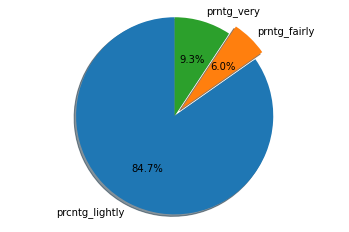

In [27]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'prcntg_lightly', 'prntg_fairly', 'prntg_very'
sizes = [84.73701435317219, 5.961475524802468, 9.30151012202534]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Most of the time, activity is light.We could include what factors are affecting this in future and If the customers are interested in such input

# Which day women burns more calories?

In [28]:
#s = pd.date_range(dailyCalories['ActivityDay'],dailyCalories['ActivityDay'], freq='D').to_series(name='vals')
#dailyCalories['Day Name']= s.dt.day_name().to_frame().reset_index()['vals']
dailyCalories
dailyCalories['ActivityDay'] = pd.to_datetime(dailyCalories['ActivityDay'])
dailyCalories['dayOfWeek'] = dailyCalories['ActivityDay'].dt.day_name()
Calory_day = dailyCalories.groupby('dayOfWeek').Calories.mean().to_csv("Calory_per_day.csv")

In [38]:
Calory_per_day=pd.read_csv("Calory_per_day.csv")
Calory_per_day.head()

,dayOfWeek,Calories
0,Friday,2331.785714
1,Monday,2324.208333
2,Saturday,2354.967742
3,Sunday,2263.000000
4,Thursday,2199.571429


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2199.5714285714284'),
  Text(1, 0, '2263.0'),
  Text(2, 0, '2302.62'),
  Text(3, 0, '2324.208333333333'),
  Text(4, 0, '2331.785714285714'),
  Text(5, 0, '2354.967741935484'),
  Text(6, 0, '2356.013157894737')])

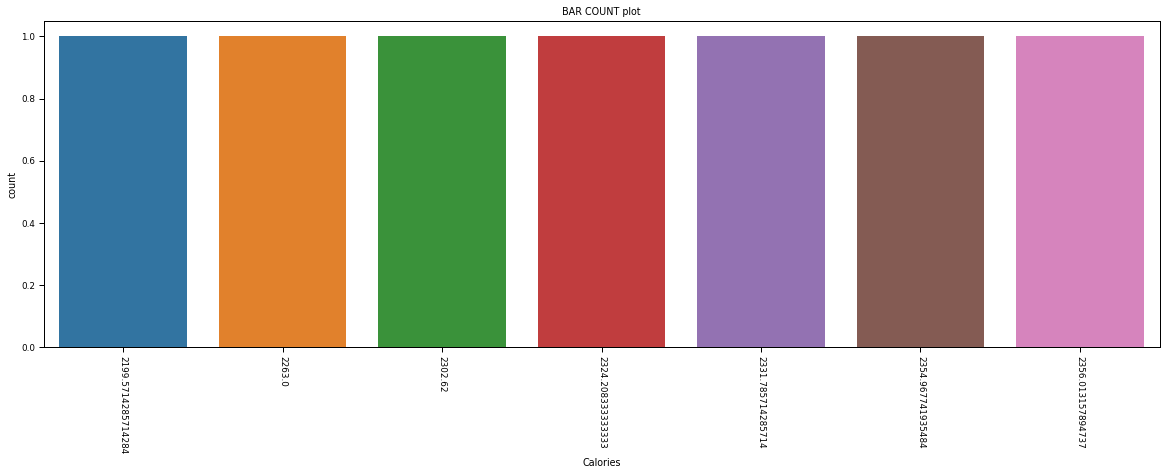

In [42]:
# Bar Count plot
import seaborn as sns
plt.figure(figsize=(20,6))
plt.title('BAR COUNT plot')
sns.set_context('paper')
sns.countplot(x='Calories', data=Calory_per_day)

# rotate x-labels
plt.xticks(rotation = -90)

At Thursday women's burning calory is lowest where Tuesday has highest calory burning record.


Insights for Marketing Strategy that could be employed by Bellabeat company
Following the statistical analyses and visualisation these data driven decisions can be helpful for marketing team:

Generally on an average TotalMinutesAsleep Vs TotalSteps Viz, it seems that, women having total steps between 5000-10000 per day, having a good sleep record. Also, walking nearby 10000 steps is a standard for female. So, we can convince to the non-user that, to build up her good walking and sleeping habit, bellabeat's product will be good choice.
Women are more conscious of their sudden increase in weight and particularly post pregnancy and we know that the ideal BMI range for adult is 18.5-24.9. When BMI is over 24.9, that indicates overweight. In our Distance Vs BMI Viz, we are seeing that overweight women are more willing to lose their weight by walking more distance. So, women who are fatty, they can use bellabeat products to be slim with more willing.
Suppose anyone want to follow a diet where how much time she should consume at her walking is described. At her fifty minute's walking, her instructor said that she should do more fairly activities. So, she can use bellabeat products to follow instructions as we see at Type of Activity phase.
It's always good to having medium heart rate. When a user do more exercise/activity it'll be bad for her. Also, at sleeping heart rate becomes slow as we see at Heart rate Vs Hour graph. So, bellabeat products can be good assistant when to sleep or measuring type of activities.
It's a good trend to consume calories at week days same as weekend at Calories Vs Days graph. So, when a user will be so busy in her daily activities, bellabeat products reminder will help her to burn her calory.